In [1]:
# MODULE 03 - HOUSING HOLDOUT GRADING

from pathlib import Path
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    mean_absolute_error,
    median_absolute_error,
)

# READ IN THE CSV FILES
team_dir = Path("./")
teams = team_dir.glob("*-predictions.csv")
team_list = []
for team in teams:
    # print(latent_file)
    team_list.append((str(team).split("-", 1)[0], team))

# print(team_list)

In [2]:
# READ IN THE HOLDOUT ANSWERS
targets_file = "https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing_holdout_test_mini_answers.csv"
targets = pd.read_csv(targets_file)
# targets

In [3]:
# ARE THE STUDENT DATASETS THE CORRECT LENGTH
student_datasets = {}
for group, file in team_list:
    ds = pd.read_csv(file)

    if ds.shape != targets.shape:
        print(
            f"Error group {group} ds had {ds.shape} rows and columns instead of the expected {targets.shape}. It will be excluded."
        )
    else:
        student_datasets[group] = ds
        print(f"Group {group} added successfully")

Group team3 added successfully


In [4]:
student_datasets

{'team3':             price
 0   547418.333732
 1   702328.412612
 2   174198.393923
 3   357907.120758
 4   366302.219680
 ..            ...
 76  732059.332253
 77  728561.930800
 78  709346.262011
 79  277054.259891
 80  714078.056835
 
 [81 rows x 1 columns]}

In [5]:
results_dict = {}

In [6]:
for group, student_ds in student_datasets.items():
    student_dict = {}
    # print(group,cm)
    student_ds.columns = ["price"]
    mse = mean_squared_error(targets, student_ds, squared=False)
    # print("{} - RMSE: {}".format(group, mse))

    student_dict["RMSE"] = mean_squared_error(targets, student_ds, squared=False)
    student_dict["Mean Abs Error"] = mean_absolute_error(targets, student_ds)
    student_dict["Median Abs Error"] = median_absolute_error(targets, student_ds)
    student_dict["R2"] = r2_score(targets, student_ds)

    combined = pd.concat([targets, student_ds], axis=1)
    combined.columns = ["target", "pred"]
    combined["absdiff"] = (combined["target"] - combined["pred"]).abs()
    combined["absdiff_pct"] = combined["absdiff"] / combined["target"]

    shower = pd.DataFrame(student_ds, columns=["price"])
    shower.columns = ["predictions"]
    testfinal = pd.concat([shower, targets["price"]], axis=1)
    testfinal["difference"] = testfinal["price"] - testfinal["predictions"]
    testfinal["percent_difference"] = abs(testfinal["difference"] / testfinal["price"])
    testfinal["percent_bucket"] = [
        "above 20%" if i >= 0.2 else "below 20%" for i in testfinal.percent_difference
    ]

    # testfinal

    student_dict["dataset"] = testfinal
    percents = [5, 10, 20]
    for percent in percents:
        student_dict[f"Percent of houses within {percent} percent"] = (
            len(combined[combined["absdiff_pct"] <= (percent / 100)])
            / len(combined)
            * 100
        )

    results_dict[group] = student_dict

In [7]:
# df['predictions']

In [8]:
# results_dict

In [9]:
results_df = pd.DataFrame(results_dict)
results_ds_trans = results_df.transpose()
results_ds_trans = results_ds_trans.drop(columns=["dataset"])

results_ds_trans = results_ds_trans.round(2)
results_ds_trans = results_ds_trans.sort_values(by="R2", ascending=False)

In [10]:
# results_df

-------------------------------- TEAM3 RESULTS ---------------------------------

 Within 5%: 22.22222222222222%
 Within 10%: 43.20987654320987%
 Within 20%: 76.5432098765432%
 R^2: 0.8335009527298516%
 RMSE: 116636.41640192292
 Mean Absolute Error: 76630.10692632056
 Median Aboslute Error: 46008.78652852768


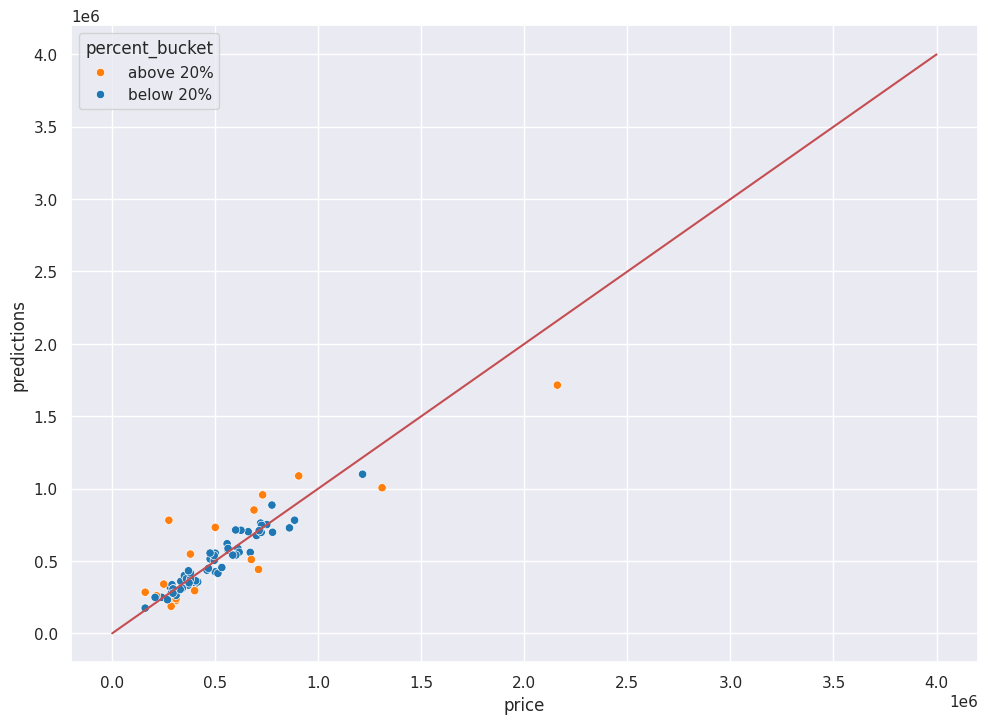

-----------------------------------------------------------------------------






In [11]:
sns.set(rc={"figure.figsize": (11.7, 8.27)})
for team_results in results_dict.items():
    testfinal = team_results[1]["dataset"]
    # print(team_results['dataset'])
    # print(f"R-Squared Value: {r2}")
    print(
        f"-------------------------------- {team_results[0].upper()} RESULTS ---------------------------------\n"
    )
    print(
        f" Within 5%: {team_results[1]['Percent of houses within 5 percent']}%\n",
        f"Within 10%: {team_results[1]['Percent of houses within 10 percent']}%\n",
        f"Within 20%: {team_results[1]['Percent of houses within 20 percent']}%\n",
        f"R^2: {team_results[1]['R2']}%\n",
        f"RMSE: {team_results[1]['RMSE']}\n",
        f"Mean Absolute Error: {team_results[1]['Mean Abs Error']}\n",
        f"Median Aboslute Error: {team_results[1]['Median Abs Error']}",
    )

    color_dict = dict({"below 20%": "tab:blue", "above 20%": "tab:orange"})
    # print(testfinal['abspercentmiss'].describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9,.95]))
    xlims = (0, 4e6)
    ylims = (0, 4e6)
    ax = sns.scatterplot(
        data=testfinal,
        x="price",
        y="predictions",
        hue="percent_bucket",
        palette=color_dict,
    )
    # ax.set(xscale="log", yscale="log", xlim=xlims, ylim=ylims)
    ax.plot(xlims, xlims, color="r")
    # plt.legend(labels=['perfect',"below 5",'above 5','10-20%','above 20'])
    plt.show()
    print(f"-" * 77)
    print("\n" * 3)

In [12]:
results_ds_trans = results_df.transpose()

results_ds_trans = results_ds_trans.drop(columns=["dataset"])
results_ds_trans.to_csv("class_results.csv")
results_ds_trans

,Mean Abs Error,Median Abs Error,Percent of houses within 10 percent,Percent of houses within 20 percent,Percent of houses within 5 percent,R2,RMSE
team3,76630.106926,46008.786529,43.209877,76.54321,22.222222,0.833501,116636.416402
